In [1]:
import sys
sys.path.append("..")

# basics
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import copy
import qutip
from tqdm import tqdm as tqdm

# custom stuff
import system.from_higher_basis_truncation_tunable_full_cosine as system
import utils.solver as solver
import pulse.tukey as tukey
import utils.expectation_values as expv
import utils.graph as graph
import utils.saver as saver

# parallel utils
from qutip.parallel import parallel_map as parallel_map
from qutip.parallel import parfor as parfor

pass

In [2]:
# create experimental graphs
fids = np.array(pd.read_csv("../mingkang_graphing/timeRabi/TimeRabi_amp0.38.csv", header=None).values.tolist()).transpose()
freq_list = pd.read_csv("../mingkang_graphing/timeRabi/TimeRabi_amp0.38_Freq.csv", header=None)[0].to_list()
dur_list = pd.read_csv("../mingkang_graphing/timeRabi/TimeRabi_amp0.38_pulseLength.csv", header=None)[0].to_list()

/var/folders/8w/jht5wjcd4kl492xz8hs9lft40000gn/T/ipykernel_16196/1418150401.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(freq_list, dur_list, fids)


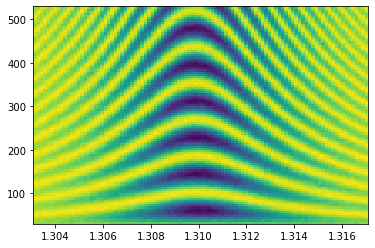

In [3]:
plt.pcolormesh(freq_list, dur_list, fids)

In [5]:
center_offset = 0.2628912071535022
freq_list = system.first_energy_spacing/3 - np.linspace(center_offset-0.4, center_offset+0.4, 150)
dur_list = np.linspace(25, 225, 150)
tanh.setup(11.100294042683936, 0, ramp_slope, cut_factor, dur_list) # just need to have correct amp
stuff3 = generate_fidelity_landscape(system, tanh, freq_list, dur_list, t_multiplier=2)

def generate_fidelity_landscape(system, pulse, freq_list, dur_list, t_multiplier=5):
    fids = [] # an array of columns in the landscape
    for freq in tqdm(freq_list):
        fid_column = []
        for dur in dur_list:
            tlist = np.linspace(0, dur, int(dur*t_multiplier))
            pulse.setup(amplitude=pulse._amp, drive_frequency=freq, ramp_slope=ramp_slope, cut_factor=cut_factor, tlist=tlist)
            s = solver.time_evolve(system.H0, system.H1, pulse.pulse_func, tlist, system.starting_state)
            fidelity = expv.expectation_value(s.states[-1], system.target_state)
            fid_column.append(fidelity)
        fids.append(fid_column)

    plt.pcolormesh(freq_list / (2*np.pi), dur_list, np.swapaxes(fids,0,1), shading='auto')
    
    return fids

101